In [2]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install geopandas

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (177 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1bu

     |████████████████████████████████| 921kB 2.9MB/s 
     |████████████████████████████████| 11.9MB 40.4MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=697909694d07f2483ed8f100bc87f9e86c77f006d058c95808c1e0c922e472ee
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gdp
from shapely.geometry import Point, Polygon
import folium,json
from mpl_toolkits.basemap import Basemap

In [0]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/train.csv', dtype = {'piscina':'int32', 'gimnasio':'int32', 'usosmultiples':'int32', 'escuelascercanas':'int32',
                                         'centroscomercialescercanos':'int32', 'precio':'int32', 'id':'int32'},parse_dates = ['fecha'])

In [0]:
# Me guardo una versión del dataframe con NaNs
data_original = df
#Quito todos los NaN y los pasa a valor 0
df = df.replace(np.nan, 0)
#Continuar casteando valores que ocupan demasiada memoria (ahora puedo hacerlo en aquellos que tenian NaN)
df = df.astype({'banos':'int32', 'antiguedad':'int32', 'garages':'int32', 'habitaciones':'int32', 'metroscubiertos':'int32', 'metrostotales':'int32',
                    'idzona':'int32'})
#Establecer como category el tipo de propiedad
categorias = df['tipodepropiedad']
categorias = categorias.astype('category').dtypes
df = df.astype({'tipodepropiedad':'category'})



In [0]:
df = df.drop([0],axis=0) #Elimino los tipos 0 que desconozco que clase de propiedad son
# Creamos la lista de latitudes y longitudes.
lats, lons = list(df['lat']), list(df['lng'])
lat = 23
lon = -102

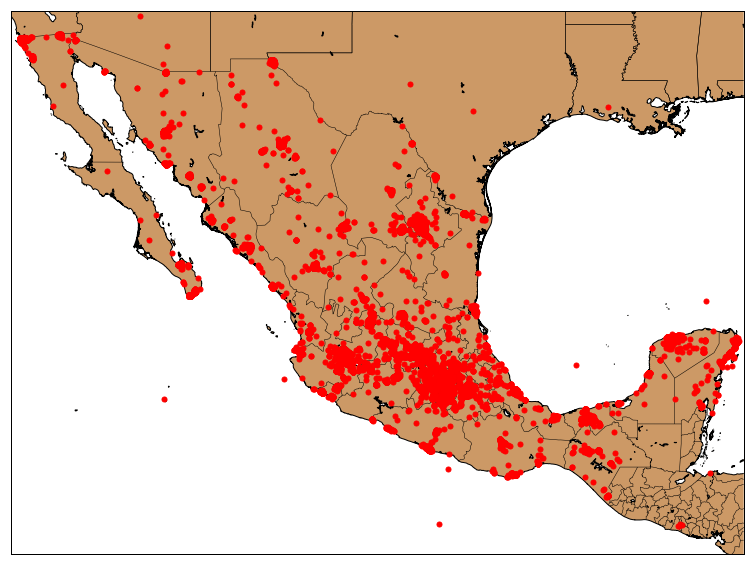

In [11]:
##Analizo sobre Mexico todas las publicaciones
figu, ax = plt.subplots(figsize=(20,10))
eq_map = Basemap(projection='merc',
                  lat_0 = 23, lon_0 = -102,
                  resolution = 'h', area_thresh = 0.1,
                  llcrnrlon=lon-15.5, llcrnrlat=lat-10.5,
                  urcrnrlon=lon+15.5, urcrnrlat=lat+10.5)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = '#cc9966')
eq_map.drawmapboundary()
eq_map.drawstates()

## Coordenadas a posiciones
x,y = eq_map(lons, lats)
eq_map.plot(x, y, 'o',c='red', markersize=5)

plt.show()

# Pruebo Geopandas

In [0]:
crs = {'init': 'epsg:4326'} #Indico el tipo de coordenadas a usar para geopandas

In [0]:
geometry = [Point(xy) for xy in zip(data['lat'].dropna(), data['lng'].dropna())]
len(geometry)

In [0]:
data[['lat', 'lng']].size

In [0]:
geo_df = gdp.GeoDataFrame(data.dropna(subset = ['lat', 'lng']), crs = crs, geometry = geometry)
geo_df.head()

In [0]:
geo_df.columns

In [0]:
street_map = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize = (15, 15))
street_map.plot(ax = ax, alpha = 0.4, color = 'blue')
geo_df[geo_df['piscina'] == 1.0].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'Positivo')
#plt.legend(prop = {'size':15})

In [0]:
gdp.datasets.available

In [0]:
df = gdp.read_file(gdp.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')


In [0]:
import plotly.graph_objects as go

# Load data frame and tidy it.
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['total exports'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = '2011 US Agriculture Exports by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()



In [0]:
data.columns

In [0]:
gdp.datasets

In [0]:
world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
cities = gdp.read_file(gdp.datasets.get_path('naturalearth_cities'))
world.plot()
geo_df[geo_df['piscina'] == 1.0].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'Positivo')
#plt.legend(prop = {'size':15})